In [1]:
# load packages
import pandas as pd
import requests
import seaborn as sns
from bs4 import BeautifulSoup

# set basic variables
tmp_reviews = [] # temporary list of dicts
page = "https://kultura.zpravy.idnes.cz/recenze-mirky-spacilove.aspx" #starting page

# go to web and get all pages with links to reviews
while page:
    # get every page
    #print("Working on %s" % page)
    page_html = BeautifulSoup(requests.get(page).text, "html.parser")
    
    #parse data for every element .rec-box
    for element in page_html.find_all("","rec-box"):
        #split header - rating % name
        tmp = element.getText().split("%",1)
        row = {"film": tmp[1].strip(), "rating": int(tmp[0].strip())}
        #get next art element and extract url
        row["url"] = element.find_next_sibling("","art").find("a").get("href")
        tmp_reviews.append(row)
        
    #try to find link to the next page
    try:
        page = page_html.find("td","tar").find("a","ico-right").get("href")
    except AttributeError:
        page = None

# make data frame
reviews = pd.DataFrame(tmp_reviews)


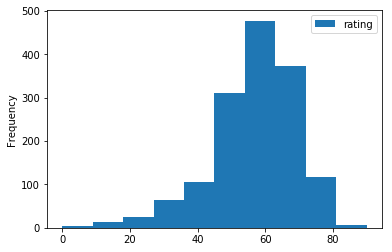

In [2]:
# create basic histogram
# the same as: sns.distplot(reviews.rating, bins=10, kde=False, hist=True)
reviews.plot.hist()

In [3]:
#write CSV
reviews.to_csv("reviews.csv", index=False, encoding="utf-8")

In [4]:
reviews.rating.value_counts(sort=False)

0       1
5       2
10      9
15      5
20     11
25     13
30     37
35     26
40    105
45     42
50    269
55    147
60    330
65    163
70    210
75     56
80     62
85      4
90      2
Name: rating, dtype: int64

In [5]:
reviews.describe()

,rating
count,1494.000000
mean,56.987952
std,13.211550
min,0.000000
25%,50.000000
50%,60.000000
75%,65.000000
max,90.000000
